<a href="https://colab.research.google.com/github/TrinhVox/plant_classifier/blob/main/Plant_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import torch
import torchvision
import torchvision.datasets as dset
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from IPython.display import HTML

In [10]:
dataroot_train = "/content/gdrive/My Drive/data/plant_disease/Train"
dataroot_test = "/content/gdrive/My Drive/data/plant_disease/Test"
dataroot_validation = "/content/gdrive/My Drive/data/plant_disease/Validation"


workers = 2

#Batch size for training
batch_size = 32

#Size of images to be resized to 
img_size = 64

#Number of training epochs
num_epochs = 5

#Learning rate for optimizers
lr = 0.001

#Beta1 hyperparameter for Adam optimizers
beta1 = 0.5 


In [11]:
train_set = dset.ImageFolder(root=dataroot_train,
                             transform = transforms.Compose([
                                                             transforms.Resize(img_size),
                                                             transforms.CenterCrop(img_size),
                                                             transforms.ToTensor(),
                                                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                             ]))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           shuffle=True)

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")


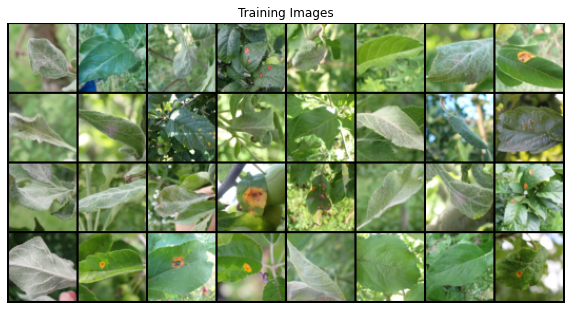

In [13]:
#Plot some training images
batch = next(iter(train_loader))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(batch[0].to(device)[:32], padding=2,
                                                    normalize=True).cpu(),(1,2,0)))